# Aggregation Limited Diffusion

Simulation of diffusion-limited aggregation (DLA) producing fractal cluster growth. Demonstrates how random particle motion creates complex branched structures with fractal properties.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [2]:
#x is vertical cordinate!

def one_particle_falls_down(latt, l):
    x = x_0
    y = random.randint(0, l)
    
    while latt[x-1, y] == 0 and latt[x, (y+1)%l] == 0 and latt[x, (y-1)%l] == 0:
        rand = random.random()
        if   rand <= 0.25:
            x -= 1
        elif rand <= 0.5 :
            x += 1
        elif rand <= 0.75:
            y += 1
        elif rand <= 1   :
            y -= 1
        
        if x >= (x_max - 5):
            #produce a new particle
            x = x_0
            y = random.randint(0, l)
            
        if   y < 0:
            y += l
        elif y > (l-1):
            y -= l      

    return x, y

In [4]:
%%time

x_0   = 100
x_max = 201

l    = 200
latt = np.zeros((l, x_max))
latt[0, :] = [1]
print(latt)

#particles
N    = 5000


for n in range(N):
    x, y = one_particle_falls_down(latt, l)
    latt[x, y] = (int(n/10000) + 1)


[[1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Wall time: 3min 58s


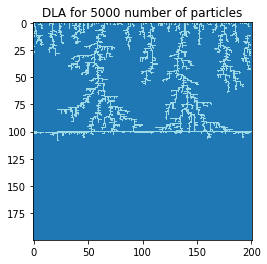

In [5]:
import matplotlib.cm as cm

latt = latt / 10000

fig , ax = plt.subplots()
ax.imshow(latt ,cmap = cm.tab20)
plt.title('DLA for {} number of particles' .format(N))
plt.savefig("DLA.png")

This is the first try that didn't respond.

In [2]:
import sys

sys.setrecursionlimit(100000)

In [3]:
def sum_neighbours(latt, x, y, h, l):
    sum_neigh = 0
    if y == 0:
        sum_neigh = 1
    elif y == l-1:
        sum_neigh = (latt[y, (x+1)%l] + latt[y-1, x] + latt[y, (x-1)%l])
    else:
        sum_neigh = (latt[y, (x+1)%l] + latt[y, (x-1)%l] + latt[y-1, x] + latt[y+1, x])
    
    return sum_neigh


In [4]:
def new_particle(h, l):
    x = random.randint(0, l)
    y = h
    return x, y


In [5]:
def next_step(latt, x, y, h, l):
    if y > (h + 49):
        x, y = new_particle(h, l)
    
    rand = random.random()
    if   rand <= 0.25:
        x += 1
        x = x%l
    elif rand <= 0.5 :
        x -= 1
        x = x%l
    elif rand <= 0.75:
        y += 1
    elif rand <= 1   :
        y -= 1
        if y == 0:
            return latt
        
        
    if sum_neighbours(latt, x, y, h, l) > 0:
        latt[y, x] = 1
        return latt
    else:
        next_step(latt, x, y, h, l)
        

In [ ]:
l = 200
h = 5

latt = np.zeros((l, l))
latt[0, :] = [1]

N = 200

x, y = new_particle(h, l)
next_step(latt, x, y, h, l)
    

for n in range(N):
    x, y = new_particle(h, l)
    next_step(latt, x, y, h, l)
    
print(latt)
plt.imshow(latt)